In [9]:
# Use-case 1: Stock Market Price Prediction for Tesla Stock

# Begin by importing all necessary imports where we have decided to use a polynomial regression model to predict
# the stock price of Tesla as stock prices seldomly fluctuate linearly. 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
# First, we need to read in the csv data that we downloaded from the Tesla Yahoo pages.
url = "/Users/gisle/Documents/IntroAI/oblig2/TSLA.csv"
# Create a data frame out of the raw data that we downloaded from Yahoo
df = pd.read_csv(url)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-24,205.820007,213.500000,198.589996,211.250000,211.250000,100446800
1,2022-10-25,210.100006,224.350006,210.000000,222.419998,222.419998,96507900
2,2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500
3,2022-10-27,229.770004,233.809998,222.850006,225.089996,225.089996,61638800
4,2022-10-28,225.399994,228.860001,216.350006,228.520004,228.520004,69152400
...,...,...,...,...,...,...,...
245,2023-10-16,250.050003,255.399994,248.479996,253.919998,253.919998,88917200
246,2023-10-17,250.100006,257.179993,247.080002,254.850006,254.850006,93562900
247,2023-10-18,252.699997,254.630005,242.080002,242.679993,242.679993,125147800
248,2023-10-19,225.949997,230.610001,216.779999,220.110001,220.110001,170772700


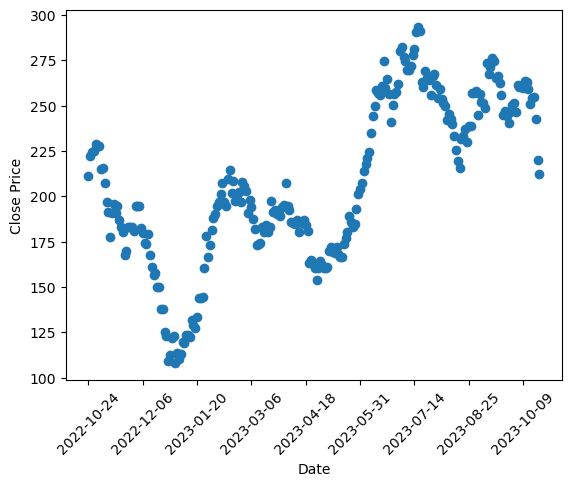

In [11]:
# Now we want to create a scatterplot where input is the date and the output is the closing price of the Tesla Stock
plt.scatter(x='Date', y='Close', data=df)
plt.xticks(df['Date'][::30], rotation=45)  # Label every 30th date, and rotate labels by 45 degrees for readability
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [17]:
# We can see that the stock price has many slopes, which makes linear regression extra tricky. Fortunately, polynomial regression takes into account
# curvatures within the graph.

# We'll convert the 'Date' column to a datetime format since we'll be able to perform operations on datetimes in regression models.
df['Date'] = pd.to_datetime(df['Date'])
# Create a new column Date num, with (df['Date'] - df['Date'].min()), which calculates the time difference between each date
# compared to the minimum date, which results in a series of timedelta objects.
# With the .dt.days we extract the number of days in each time delta and we convert the timedelta into integers.
df['Date_num'] = (df['Date'] - df['Date'].min()).dt.days

# Then we need to divide the dataset into training and testing datasets
# First we need to take the Date_num values as the x axis by placing it into a NumPy array. The reshape(-1,1) method is used to change the shape
# of the NumPy array. -1 in the first dimension means that the number of rows should be automatically assigned based on the length of the array.
# 1 as the second argument says that we want exactly one column in the reshaped array. So the transformed matrix is two dimensional with only a column.
X = df['Date_num'].values.reshape(-1, 1)
# We reshape X and not y, because scikit-learns' Regression model expects input features to be in 2 dimensional space, whilst the target value
# y doesn't need to, because it is the TARGET and not the INPUT.
y = df['Close'].values

# Supervised learning where the test size is 20% of the data whilst 80% is the training data. We always want the testing data to be significantly smaller
# because real life models only get a limited number of samples. random_state=0 means we get the same result everytime we run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# After extensive testing, we found out that Polynomial regressions of degree 6 yielded the best results. The method is a preprocessing technique which
# generates polynomial features and we can create them by raising the orginal features to many potenser. 
poly = PolynomialFeatures(degree=6)

# We perform the polynomial transformation of the X_Train and X_test data where we generate new features from the old by taking the power and product of each 
# number in the column, that way we can capture complex patterns and relationships between the date and the price.
# fit_transform() is different from transform() because it determines the the coefficients and powers to use for generating polynomial features
# based on the distribution of the training data.
# transform() on the other hand in the test data is used because we have already learned the pattern of the distribution from the training data.
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# We instantiate the model object because we have our target and dependent variable and we combine polynomial transformations with linear regression.
model = LinearRegression()
# Now we train the linear regression model with our polynomial transformed data and fit() using an optimization algorithm such as gradient descent to
# minimize the error between the predicted and actual values of the data.
model.fit(X_poly_train, y_train)

df

,Date,Open,High,Low,Close,Adj Close,Volume,Date_num
0,2022-10-24,205.820007,213.500000,198.589996,211.250000,211.250000,100446800,0
1,2022-10-25,210.100006,224.350006,210.000000,222.419998,222.419998,96507900,1
2,2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500,2
3,2022-10-27,229.770004,233.809998,222.850006,225.089996,225.089996,61638800,3
4,2022-10-28,225.399994,228.860001,216.350006,228.520004,228.520004,69152400,4
...,...,...,...,...,...,...,...,...
245,2023-10-16,250.050003,255.399994,248.479996,253.919998,253.919998,88917200,357
246,2023-10-17,250.100006,257.179993,247.080002,254.850006,254.850006,93562900,358
247,2023-10-18,252.699997,254.630005,242.080002,242.679993,242.679993,125147800,359
248,2023-10-19,225.949997,230.610001,216.779999,220.110001,220.110001,170772700,360


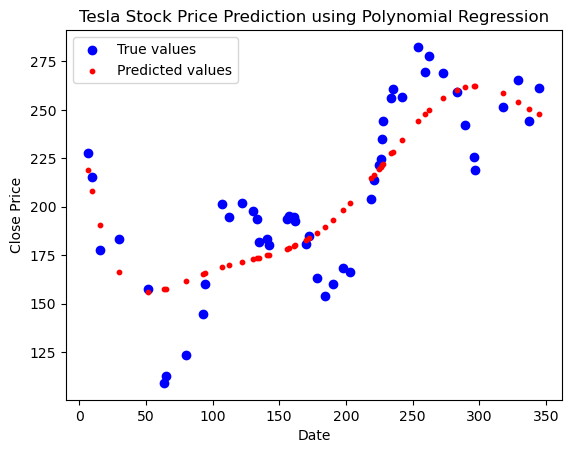

In [13]:
# During training of the machine learning model, the model learns a math equation, which relates the polynomial transformed data to the price of the stock.
# In other words, this math equation models the change in stock prices given the change in date. In the code below, predict() takes in the poly
# transformed data and applies it to the math equation to predict the price and the output is an array.
y_pred = model.predict(X_poly_test)

# Compare the real values which are the blue dots to the predicted values which are the blue dots (in size 10). We also label the graph with relevant info.
plt.scatter(X_test, y_test, color='blue', label='Real values')
plt.scatter(X_test, y_pred, color='red', s=10, label='Predicted values')
plt.title('Tesla Stock Price Prediction using Polynomial Regression')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [19]:
# Evaluate the model's performance by using the Mean Squared Error metrics. The mean squared error quantifies the average squared difference between 
# the predicted value and the actual value, where the lower the MSE, the more accurate the model is.
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Below is the root mean squared error, which is simply the square root of the MSE.
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 533.8862313291452
Root Mean Squared Error: 23.10597825951425


In [18]:
# The code below calculates the R squared score, which is a measurement of the variance of the predicted data compared to the real data.
# In other words, we are simply observing how well the predicted plot compares to the actual plot. 0 is the lowest which means that there is a very
# poor fit, whilst 1 represents a perfect fit. In the print method below, we simply multiply it by 100 to get our predicted "percentage" score.
r2_score = model.score(X_poly_test, y_test)
print(f"R-squared (prediction percentage) score: {r2_score * 100:.2f}%")


R-squared (prediction percentage) score: 71.36%
